# Comparing TR Speeches

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import math

import operator as opr

# Reading in the speeches
The 1901 and 1905 speeches are inaugural addresses while the others are State of the Union speeches submitted in writing to Congress.

The speeches were read from <a href=https://www.presidency.ucsb.edu/documents/presidential-documents-archive-guidebook/annual-messages-congress-the-state-the-union> The American Presidency Project website </a> and copied to .txt files saved locally using the PullSpeechURLs.py script. This was conducted in early 2018 and the site has since changed its format.

In [9]:
TR1901= open(r'Speeches\TR_December_3_1901.txt','r').read().lower()
TR1902= open(r'Speeches\TR_December_2_1902.txt','r').read().lower()
TR1903= open(r'Speeches\TR_December_7_1903.txt','r').read().lower()
TR1904= open(r'Speeches\TR_December_6_1904.txt','r').read().lower()
TR1905= open(r'Speeches\TR_December_5_1905.txt','r').read().lower()
TR1906= open(r'Speeches\TR_December_3_1906.txt','r').read().lower()
TR1907= open(r'Speeches\TR_December_3_1907.txt','r').read().lower()
TR1908= open(r'Speeches\TR_December_8_1908.txt','r').read().lower()

In [157]:
TRspeeches= [TR1901,TR1902,TR1903,TR1904,TR1905,TR1906,TR1907,TR1908]
TRspeeches_str= ['TR1901','TR1902','TR1903','TR1904','TR1905','TR1906','TR1907','TR1908']

# Set Stopwords and start tokenizing

In [11]:
STOPWORDS= set(stopwords.words('english'))

In [12]:
TR_Tok= [word_tokenize(i) for i in TRspeeches]

In [13]:
for i in TR_Tok:
    print(len(i))

20944
10461
16322
18731
26999
25511
29518
21052


In [14]:
TR_NoStop= [[i for i in j if i not in STOPWORDS] for j in TR_Tok]

In [15]:
TR_Sort= [sorted(list(i)) for i in TR_NoStop]

The punctuation pulling requires a little refining. This process is very manual currently; I am searching for the index of the first proper word and taking a slice from the beginning of the sorted text to the index of the character which precedes the first word.

Issues:

Split words (hyphenated and continued on another line) may be excluded ("-ire")

Typos cause certain words, though not overly consequential ones, to be removed as a result as some will have a "." attached on the left.

Unless much more manual processing is done, numbers are excluded. Nautical measurements Teddy uses ("20-knot", etc) are excluded as well, but these may provide interesting insight.

In [16]:
TR_PuncInd= [TR_Sort[0][0:1501],TR_Sort[1][0:776],TR_Sort[2][0:1631],TR_Sort[3][0:1443],TR_Sort[4][0:2063],TR_Sort[5][0:2062],TR_Sort[6][0:2351],TR_Sort[7][0:1770]]

Defining function remove_punc() to loop through each item in a list (TR_PuncInd) to then iterate over items in the sublists. Initializing TR_Punc as empty list to be appended by remove_punc().

In [17]:
TR_Punc= []

In [18]:
def remove_punc(arg):
    for i in arg:
        if i not in TR_Punc:
            TR_Punc.append(i)

In [19]:
for i in TR_PuncInd:
    remove_punc(i)

# Bag of Words

Collect all the words into a list

In [20]:
words= []
for i in range(0,len(TR_Tok)):
    words.append(list())

In [21]:
def add_words(arg,num):
    for i in arg:
        if i not in words[num]:
            if i not in TR_Punc:
                words[num].append(i)

In [22]:
for i in range(0,len(TR_Sort)):
    add_words(TR_Sort[i],i)

Collect all the counts for each word to a list.

In [23]:
def add_count(arg,num):
    for i in arg:
        if i in words[num]:
            count[num][words[num].index(i)]= count[num][words[num].index(i)] + 1

In [24]:
count= [[0 for i in range(0,len(words[j]))] for j in range(0,len(words))]

for i in range(0,len(TR_Sort)):
    add_count(TR_Sort[i],i)

In [25]:
TR_Max= [max(i) for i in count]
TR_Min= [min(i) for i in count]
TR_Mean= [sum(i)/len(i) for i in count]

count_sort= [sorted(list(i)) for i in count]
TR_Median= [[i[int(len(i)/2-.5)],i[int(len(i)/2+.5)]] for i in count_sort]

Zip up the lists to create the Bag of Words for each speech.

In [26]:
BOW= [list(zip(words[i],count[i])) for i in range(0,len(words))]

An interesting preview into the upcoming analysis. TR's speeches seem to get more repetitive over time, with his most repetitive (by far) being 1907. This is the only speech in this analysis with a median greater than 1.

In [27]:
for i in range(0,len(BOW)):
    print(BOW[i][0:20],'\n','\tMax: ',TR_Max[i],'\n','\tMin: ',TR_Min[i],'\n','\tMean: ',TR_Mean[i],'\n','\tMedian: ',TR_Median[i],'\n')

[('abandon', 1), ('abandoning', 1), ('abide', 1), ('abilities', 1), ('ability', 4), ('ability.i', 1), ('able', 11), ('ablest', 1), ('aboard', 2), ('abolished', 1), ('aboriginal', 1), ('abounding', 1), ('about.i', 1), ('abra', 1), ('abroad', 7), ('abrogated', 1), ('absolutely', 4), ('abundance', 1), ('abundant', 1), ('abuses', 3)] 
 	Max:  60 
 	Min:  1 
 	Mean:  2.7954815695600477 
 	Median:  [1, 1] 

[('abandon', 1), ('abandoning', 1), ('abandonment', 1), ('ability', 2), ('able', 1), ('aboard', 1), ('abroad', 3), ('abroad.i', 1), ('absolute', 1), ('absolutely', 1), ('absorption', 4), ('abstract', 1), ('acceded', 1), ('accepted', 1), ('access', 3), ('accidental', 1), ('accomplish', 1), ('accomplished', 4), ('accord', 1), ('accordance', 1)] 
 	Max:  36 
 	Min:  1 
 	Mean:  2.214935375777884 
 	Median:  [1, 1] 

[('abandon', 2), ('abandoned', 1), ('abating', 1), ('ability', 2), ('abnormal', 2), ('above-mentioned', 1), ('absence', 1), ('absolute', 1), ('accentuated', 1), ('accepted', 1), 

# TF-IDF

### Calculating TF
(Total word presence in document divided by total words in document)
 
 I will only be considering the documents <b>without the stopwords </b> for these formulas.

In [127]:
def TF_Formula(BOW):
    counts= [i[1] for i in BOW]
    TFs= [round(i[1] / sum(counts),8) for i in BOW]
    Terms= [i[0] for i in BOW]
    TFs= list(zip(Terms,TFs))
    return TFs

In [128]:
Term_Freqs= [TF_Formula(i) for i in BOW]

In [124]:
print(BOW[0][0][0])
print(Term_Freqs[0][0][0])
for i in Term_Freqs:
    print(i[0:10])

abandon
abandon
[('abandon', 0.00010634), ('abandoning', 0.00010634), ('abide', 0.00010634), ('abilities', 0.00010634), ('ability', 0.00042535), ('ability.i', 0.00010634), ('able', 0.00116972), ('ablest', 0.00010634), ('aboard', 0.00021268), ('abolished', 0.00010634)]
[('abandon', 0.00021612), ('abandoning', 0.00021612), ('abandonment', 0.00021612), ('ability', 0.00043225), ('able', 0.00021612), ('aboard', 0.00021612), ('abroad', 0.00064837), ('abroad.i', 0.00021612), ('absolute', 0.00021612), ('absolutely', 0.00021612)]
[('abandon', 0.00027326), ('abandoned', 0.00013663), ('abating', 0.00013663), ('ability', 0.00027326), ('abnormal', 0.00027326), ('above-mentioned', 0.00013663), ('absence', 0.00013663), ('absolute', 0.00013663), ('accentuated', 0.00013663), ('accepted', 0.00013663)]
[('abandon', 0.00011874), ('abeyance', 0.00011874), ('ability', 0.00011874), ('abject', 0.00011874), ('able', 0.00071242), ('aboard', 0.00011874), ('abolished', 0.00011874), ('abolition', 0.00011874), ('ab

### Calculating IDF

In [116]:
def get_frequencies(corpus):
    freqs= {}
    for j in corpus:
        for i in j:
            if i[0] in freqs.keys():
                freqs[i[0]]= freqs[i[0]]+i[1]
            else:
                freqs[i[0]]= i[1]

    return(freqs)

In [117]:
def tf_idf(corpus,dictionary):
    termlist= []
    for j in corpus:
        corpuslist= []
        freqlist= []
        for i in j:
            tfidf= i[1] / dictionary[i[0]]
            corpuslist.append(i[0])
            freqlist.append(tfidf)
        corpusfreq= list(zip(corpuslist,freqlist))
        termlist.append(corpusfreq)
    
    return(termlist)

In [118]:
def get_listitem(data):
    return data[1]

In [119]:
Doc_Freqs= get_frequencies(BOW)

In [121]:
TF_IDF= tf_idf(BOW,Doc_Freqs)

In [132]:
TF_IDF= [sorted(i, key=lambda e: e[1], reverse=True) for i in TF_IDF]

In [145]:
for i in TF_IDF:
    words= [j[0] for j in i[len(i)-10:len(i)]]
    print(words)

['executive', 'message', 'authority', 'corporation', 'employees', 'railroads', 'isthmus', 'class', 'court', 'commission']
['administration', 'judgment', 'private', 'able', 'effective', 'interest', 'peace', 'form', 'treaty', 'court']
['social', 'believe', 'provide', 'tariff', 'wise', 'also', 'men', 'least', 'courts', 'come']
['agreement', 'instance', 'military', 'position', 'forests', 'regulation', 'line', 'moreover', 'panama', 'canal']
['ground', 'soil', 'board', 'farmer', 'june', 'destruction', 'exposition', 'liberty', 'opinion', 'judges']
['supply', 'forest', 'cities', 'construction', 'demand', 'regards', 'practice', 'regulation', 'field', 'canal']
['reasons', 'self-government', 'old', 'rich', 'throughout', 'panama', 'treaty', 'islands', 'indian', 'political']
['pay', 'west', 'advance', 'standard', 'building', 'prosperity', 'welfare', 'isthmus', 'rate', 'treaty']


In [156]:
for speech in TF_IDF:
    uniques= [i[0] for i in speech if i[1] == 1]
    percent= round((len(uniques)/len(speech))*100,2)
    print("Number of words unique to the speech: ",len(uniques))
    print("Number of unique words in the speech: ",len(speech))
    print("Percent of unique words (unique/total): ",percent,'\n')

Number of words unique to the speech:  680
Number of unique words in the speech:  3364
Percent of unique words (unique/total):  20.21 

Number of words unique to the speech:  265
Number of unique words in the speech:  2089
Percent of unique words (unique/total):  12.69 

Number of words unique to the speech:  506
Number of unique words in the speech:  2751
Percent of unique words (unique/total):  18.39 

Number of words unique to the speech:  537
Number of unique words in the speech:  3136
Percent of unique words (unique/total):  17.12 

Number of words unique to the speech:  657
Number of unique words in the speech:  3701
Percent of unique words (unique/total):  17.75 

Number of words unique to the speech:  685
Number of unique words in the speech:  3639
Percent of unique words (unique/total):  18.82 

Number of words unique to the speech:  697
Number of unique words in the speech:  3857
Percent of unique words (unique/total):  18.07 

Number of words unique to the speech:  607
Numbe

In [172]:
uniques= [[i[0] for i in j if i[1] == 1] for j in TF_IDF]
percent= [round((len(uniques[i])/len(TF_IDF[i]))*100,2) for i in range(0,len(TF_IDF))]
#y_pos= range(1,len(TRspeeches_str)+1)

for i in range(0,len(uniques)):
    print("Number of words unique to the speech: ",len(uniques[i]))
    print("Number of unique words in the speech: ",len(TF_IDF[i]))
    print("Percent of unique words (unique/total): ",percent[i],'\n')

Number of words unique to the speech:  680
Number of unique words in the speech:  3364
Percent of unique words (unique/total):  20.21 

Number of words unique to the speech:  265
Number of unique words in the speech:  2089
Percent of unique words (unique/total):  12.69 

Number of words unique to the speech:  506
Number of unique words in the speech:  2751
Percent of unique words (unique/total):  18.39 

Number of words unique to the speech:  537
Number of unique words in the speech:  3136
Percent of unique words (unique/total):  17.12 

Number of words unique to the speech:  657
Number of unique words in the speech:  3701
Percent of unique words (unique/total):  17.75 

Number of words unique to the speech:  685
Number of unique words in the speech:  3639
Percent of unique words (unique/total):  18.82 

Number of words unique to the speech:  697
Number of unique words in the speech:  3857
Percent of unique words (unique/total):  18.07 

Number of words unique to the speech:  607
Numbe

## Observations

Above are listed the number of words unique to each speech (TF-IDF = 1). TR's 1902 speech appears to be his least "original" by far. 1902 would have been his first State of the Union address, so perhaps he recycled many of the ideas of his inaugural address? More investigation will be necessary to confirm.

In the Bag of Words approach, it was observed that the1902 speech was TR's least repetitive and the 1907 speech was the most repetitive. The TF-IDF anaylsis shows 1907 to be relatively "original" while 1902, as mentioned, has the fewest words which are unique to that speech. This is interesting and seems to suggest a correlation between repeated and unique words in a speech, though it certainly does not confirm this observation.

This analysis doesn't really show all that much, but with a bigger corpus (the whole of the speeches collection) it may be much more interesting.

# Plotting

[20.21, 12.69, 18.39, 17.12, 17.75, 18.82, 18.07, 18.96]


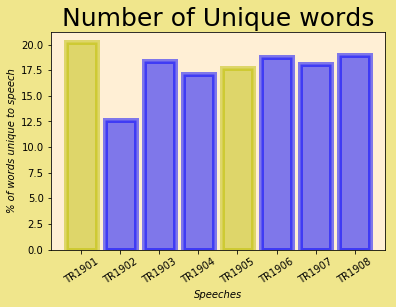

In [189]:
uniques= [[i[0] for i in j if i[1] == 1] for j in TF_IDF]
percent= [round((len(uniques[i])/len(TF_IDF[i]))*100,2) for i in range(0,len(TF_IDF))]
y_pos= range(1,len(TRspeeches_str)+1)
chroma= ['y','b','b','b','y','b','b','b']

fig= plt.figure()
ax= fig.add_subplot(1,1,1)

fig.patch.set_facecolor('Khaki')
ax.set_facecolor('Papayawhip')

plt.title("Number of Unique words", size= 25)
plt.xlabel("Speeches",fontstyle= 'italic')
plt.ylabel("% of words unique to speech",fontstyle= 'italic')

plt.xticks(y_pos, TRspeeches_str,rotation= 33)

plt.bar(y_pos,percent, align= 'center', color= chroma, edgecolor= chroma, linewidth= 5,alpha= 0.5)

print(percent)
plt.show()